# <center>Data processing

In [1]:
import os
os.chdir("..")

%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import timedelta

In [3]:
# import warnings
# warnings.simplefilter('ignore')

pd.set_option('display.max_columns', 500)

In [4]:
data_path = Path("data")

In [5]:
example_predictions_name = "example_predictions.pkl"
test_features_name = "test_features.pkl"
train_features_name = "train_features.pkl"
train_outcomes_name = "train_outcomes.pkl"

### data

In [6]:
test_features = pd.read_pickle(data_path /test_features_name)
train_features = pd.read_pickle(data_path / train_features_name)
train_outcomes = pd.read_pickle(data_path / train_outcomes_name)

In [7]:
test_features.shape, train_features.shape, train_outcomes.shape

((627908, 32), (2106808, 32), (2106808, 1))

#### how many trading items are every day

In [8]:
items_day_nums = [len(train_features.loc[ind]) for ind in train_features.index.levels[0]]

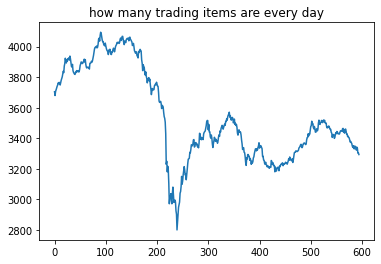

In [9]:
plt.plot(items_day_nums)
plt.title("how many trading items are every day");

### split train data

preventing data leakage

In [10]:
# reserve a year
train_ind = train_features.index

In [11]:
len(train_ind)

2106808

In [12]:
train_full_dates = train_ind.levels[0]
itemids = train_ind.levels[1]

In [13]:
train_before_year_date = train_full_dates[-1] - timedelta(days=365)
train_before_year_date

Timestamp('2014-12-25 00:00:00')

In [14]:
train_before_year = train_features[:train_before_year_date]

In [15]:
train_before_year_unique_dates = train_before_year.index.get_level_values(0).unique()

In [16]:
train_max_date_num = int(len(train_before_year_unique_dates) * 0.8)

In [17]:
train_max_date = train_before_year_unique_dates[train_max_date_num]
train_max_date

Timestamp('2012-11-23 00:00:00')

In [18]:
X_train, y_train = train_features.loc[:train_max_date], train_outcomes.loc[:train_max_date]

In [19]:
len(X_train)

1562700

In [20]:
train_end_date = X_train.index.get_level_values(0)[-1]
train_end_date

Timestamp('2012-11-23 00:00:00')

In [21]:
val_start_date = train_end_date + timedelta(days=365)
val_start_date

Timestamp('2013-11-23 00:00:00')

In [22]:
X_val, y_val = train_features.loc[val_start_date:], train_outcomes.loc[val_start_date:]

In [23]:
len(X_val)

374057

In [24]:
round(len(X_train) / (len(X_train) + len(X_val))* 100), round(len(X_val) / (len(X_train) + len(X_val)) * 100)

(81, 19)

In [25]:
X_train

f__buytransactions_1m  f__selltransactions_1m  \
date       tradingitemid                                                  
2004-08-06 2585893                          1.0                     0.0   
           2585895                          2.0                     3.0   
           2585941                          0.0                     0.0   
           2585957                          0.0                     1.0   
           2585970                          0.0                     0.0   
...                                         ...                     ...   
2012-11-23 586093745                        0.0                     0.0   
           607745150                        0.0                     0.0   
           610592433                        0.0                     0.0   
           618650356                        0.0                     0.0   
           636367352                        0.0                     0.0   

                          f__buyshares_1m  f__sellshares_1m  \
date       tradingitemid                                      
2004-08-06 2585893                10125.0               NaN   
           2585895                13000.0           -735.00   
           2585941                    NaN               NaN   
           2585957                    NaN           -831.45   
           2585970                    NaN               NaN   
...                                   ...               ...   
2012-11-23 586093745                  NaN               NaN   
           607745150                  NaN               NaN   
           610592433                  NaN               NaN   
           618650356                  NaN               NaN   
           636367352                  NaN               NaN   

                          f__buysharespctsharesout_1m  \
date       tradingitemid                                
2004-08-06 2585893                           0.000160   
           2585895                           0.000403   
           2585941                                NaN   
           2585957                                NaN   
           2585970                                NaN   
...                                               ...   
2012-11-23 586093745                              NaN   
           607745150                              NaN   
           610592433                              NaN   
           618650356                              NaN   
           636367352                              NaN   

                          f__sellsharespctsharesout_1m  f__uniquebuyers_1m  \
date       tradingitemid                                                     
2004-08-06 2585893                                 NaN                 1.0   
           2585895                           -0.000022                 2.0   
           2585941                                 NaN                 0.0   
           2585957                           -0.000007                 0.0   
           2585970                                 NaN                 0.0   
...                                                ...                 ...   
2012-11-23 586093745                               NaN                 0.0   
           607745150                               NaN                 0.0   
           610592433                               NaN                 0.0   
           618650356                               NaN                 0.0   
           636367352                               NaN                 0.0   

                          f__uniquesellers_1m  f__buytransactions_3m  \
date       tradingitemid                                               
2004-08-06 2585893                        0.0                    6.0   
           2585895                        3.0                    4.0   
           2585941                        0.0                    0.0   
           2585957                        1.0                    4.0   
           2585970                       

In [26]:
X_val

f__buytransactions_1m  f__selltransactions_1m  \
date       tradingitemid                                                  
2013-11-29 2585893                          0.0                     1.0   
           2585895                          0.0                     0.0   
           2586016                         17.0                     3.0   
           2586068                          0.0                     1.0   
           2586084                          2.0                     3.0   
...                                         ...                     ...   
2015-12-25 586093745                        0.0                     0.0   
           606023847                        0.0                     0.0   
           607745150                        0.0                     0.0   
           610592433                        0.0                     0.0   
           618650356                        0.0                     0.0   

                          f__buyshares_1m  f__sellshares_1m  \
date       tradingitemid                                      
2013-11-29 2585893                    NaN          -23550.0   
           2585895                    NaN               NaN   
           2586016                 5412.0          -27037.0   
           2586068                    NaN            -254.0   
           2586084                 8407.0          -29897.0   
...                                   ...               ...   
2015-12-25 586093745                  NaN               NaN   
           606023847                  NaN               NaN   
           607745150                  NaN               NaN   
           610592433                  NaN               NaN   
           618650356                  NaN               NaN   

                          f__buysharespctsharesout_1m  \
date       tradingitemid                                
2013-11-29 2585893                                NaN   
           2585895                                NaN   
           2586016                           0.000098   
           2586068                                NaN   
           2586084                           0.000352   
...                                               ...   
2015-12-25 586093745                              NaN   
           606023847                              NaN   
           607745150                              NaN   
           610592433                              NaN   
           618650356                              NaN   

                          f__sellsharespctsharesout_1m  f__uniquebuyers_1m  \
date       tradingitemid                                                     
2013-11-29 2585893                           -0.000427                 0.0   
           2585895                                 NaN                 0.0   
           2586016                           -0.000490                16.0   
           2586068                           -0.000045                 0.0   
           2586084                           -0.001254                 2.0   
...                                                ...                 ...   
2015-12-25 586093745                               NaN                 0.0   
           606023847                               NaN                 0.0   
           607745150                               NaN                 0.0   
           610592433                               NaN                 0.0   
           618650356                               NaN                 0.0   

                          f__uniquesellers_1m  f__buytransactions_3m  \
date       tradingitemid                                               
2013-11-29 2585893                        1.0                    0.0   
           2585895                        0.0                    2.0   
           2586016                        2.0                   37.0   
           2586068                        1.0                    1.0   
           2586084                       

### test TrainTestSplit class

In [27]:
from dataprocessing.process import TrainTestSplit

In [28]:
train_test_split = TrainTestSplit()

In [29]:
%%time
X_train, X_val, y_train, y_val = train_test_split(train_features, train_outcomes)

Wall time: 85 ms


In [30]:
print(train_test_split.ratio)
assert train_test_split.val_start_date - train_test_split.train_end_date >= timedelta(days=365)

(81, 19)


### Pipeline
1. fill na
#### if not xgboost:
2. log
3. normalization

## fill na

In [31]:
# from sklearn.impute import KNNImputer, SimpleImputer

# imputer = SimpleImputer(strategy="median")
# X_train = imputer.fit_transform(X_train)
# X_val = imputer.transform(X_val)

In [32]:
from dataprocessing.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

In [33]:
X_train

f__buytransactions_1m  f__selltransactions_1m  \
date       tradingitemid                                                  
2004-08-06 2585893                          1.0                     0.0   
           2585895                          2.0                     3.0   
           2585941                          0.0                     0.0   
           2585957                          0.0                     1.0   
           2585970                          0.0                     0.0   
...                                         ...                     ...   
2012-11-23 586093745                        0.0                     0.0   
           607745150                        0.0                     0.0   
           610592433                        0.0                     0.0   
           618650356                        0.0                     0.0   
           636367352                        0.0                     0.0   

                          f__buyshares_1m  f__sellshares_1m  \
date       tradingitemid                                      
2004-08-06 2585893                10125.0         -25629.00   
           2585895                13000.0           -735.00   
           2585941                21626.0         -25629.00   
           2585957                21626.0           -831.45   
           2585970                21626.0         -25629.00   
...                                   ...               ...   
2012-11-23 586093745              21626.0         -25629.00   
           607745150              21626.0         -25629.00   
           610592433              21626.0         -25629.00   
           618650356              21626.0         -25629.00   
           636367352              21626.0         -25629.00   

                          f__buysharespctsharesout_1m  \
date       tradingitemid                                
2004-08-06 2585893                           0.000160   
           2585895                           0.000403   
           2585941                           0.000493   
           2585957                           0.000493   
           2585970                           0.000493   
...                                               ...   
2012-11-23 586093745                         0.000493   
           607745150                         0.000493   
           610592433                         0.000493   
           618650356                         0.000493   
           636367352                         0.000493   

                          f__sellsharespctsharesout_1m  f__uniquebuyers_1m  \
date       tradingitemid                                                     
2004-08-06 2585893                           -0.000465                 1.0   
           2585895                           -0.000022                 2.0   
           2585941                           -0.000465                 0.0   
           2585957                           -0.000007                 0.0   
           2585970                           -0.000465                 0.0   
...                                                ...                 ...   
2012-11-23 586093745                         -0.000465                 0.0   
           607745150                         -0.000465                 0.0   
           610592433                         -0.000465                 0.0   
           618650356                         -0.000465                 0.0   
           636367352                         -0.000465                 0.0   

                          f__uniquesellers_1m  f__buytransactions_3m  \
date       tradingitemid                                               
2004-08-06 2585893                        0.0                    6.0   
           2585895                        3.0                    4.0   
           2585941                        0.0                    0.0   
           2585957                        1.0                    4.0   
           2585970                       

In [34]:
X_val

f__buytransactions_1m  f__selltransactions_1m  \
date       tradingitemid                                                  
2013-11-29 2585893                          0.0                     1.0   
           2585895                          0.0                     0.0   
           2586016                         17.0                     3.0   
           2586068                          0.0                     1.0   
           2586084                          2.0                     3.0   
...                                         ...                     ...   
2015-12-25 586093745                        0.0                     0.0   
           606023847                        0.0                     0.0   
           607745150                        0.0                     0.0   
           610592433                        0.0                     0.0   
           618650356                        0.0                     0.0   

                          f__buyshares_1m  f__sellshares_1m  \
date       tradingitemid                                      
2013-11-29 2585893                21626.0          -23550.0   
           2585895                21626.0          -25629.0   
           2586016                 5412.0          -27037.0   
           2586068                21626.0            -254.0   
           2586084                 8407.0          -29897.0   
...                                   ...               ...   
2015-12-25 586093745              21626.0          -25629.0   
           606023847              21626.0          -25629.0   
           607745150              21626.0          -25629.0   
           610592433              21626.0          -25629.0   
           618650356              21626.0          -25629.0   

                          f__buysharespctsharesout_1m  \
date       tradingitemid                                
2013-11-29 2585893                           0.000493   
           2585895                           0.000493   
           2586016                           0.000098   
           2586068                           0.000493   
           2586084                           0.000352   
...                                               ...   
2015-12-25 586093745                         0.000493   
           606023847                         0.000493   
           607745150                         0.000493   
           610592433                         0.000493   
           618650356                         0.000493   

                          f__sellsharespctsharesout_1m  f__uniquebuyers_1m  \
date       tradingitemid                                                     
2013-11-29 2585893                           -0.000427                 0.0   
           2585895                           -0.000465                 0.0   
           2586016                           -0.000490                16.0   
           2586068                           -0.000045                 0.0   
           2586084                           -0.001254                 2.0   
...                                                ...                 ...   
2015-12-25 586093745                         -0.000465                 0.0   
           606023847                         -0.000465                 0.0   
           607745150                         -0.000465                 0.0   
           610592433                         -0.000465                 0.0   
           618650356                         -0.000465                 0.0   

                          f__uniquesellers_1m  f__buytransactions_3m  \
date       tradingitemid                                               
2013-11-29 2585893                        1.0                    0.0   
           2585895                        0.0                    2.0   
           2586016                        2.0                   37.0   
           2586068                        1.0                    1.0   
           2586084                       

In [35]:
from dataprocessing.process import StandardScaler, SmartLogtransformer

In [36]:
logtransformer = SmartLogtransformer()
X_train = logtransformer.fit_transform(X_train)
X_val = logtransformer.transform(X_val)

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [39]:
X_train

f__buytransactions_1m  f__selltransactions_1m  \
date       tradingitemid                                                  
2004-08-06 2585893                     1.124676               -0.745641   
           2585895                     1.173487                1.348587   
           2585941                    -0.821051               -0.745641   
           2585957                    -0.821051                1.268505   
           2585970                    -0.821051               -0.745641   
...                                         ...                     ...   
2012-11-23 586093745                  -0.821051               -0.745641   
           607745150                  -0.821051               -0.745641   
           610592433                  -0.821051               -0.745641   
           618650356                  -0.821051               -0.745641   
           636367352                  -0.821051               -0.745641   

                          f__buyshares_1m  f__sellshares_1m  \
date       tradingitemid                                      
2004-08-06 2585893              -0.443263          0.003256   
           2585895              -0.288378          0.003541   
           2585941               0.027006          0.003256   
           2585957               0.027006          0.003540   
           2585970               0.027006          0.003256   
...                                   ...               ...   
2012-11-23 586093745             0.027006          0.003256   
           607745150             0.027006          0.003256   
           610592433             0.027006          0.003256   
           618650356             0.027006          0.003256   
           636367352             0.027006          0.003256   

                          f__buysharespctsharesout_1m  \
date       tradingitemid                                
2004-08-06 2585893                          -0.372335   
           2585895                           0.005511   
           2585941                           0.087960   
           2585957                           0.087960   
           2585970                           0.087960   
...                                               ...   
2012-11-23 586093745                         0.087960   
           607745150                         0.087960   
           610592433                         0.087960   
           618650356                         0.087960   
           636367352                         0.087960   

                          f__sellsharespctsharesout_1m  f__uniquebuyers_1m  \
date       tradingitemid                                                     
2004-08-06 2585893                            0.000805            1.137242   
           2585895                            0.000805            1.186371   
           2585941                            0.000805           -0.821200   
           2585957                            0.000805           -0.821200   
           2585970                            0.000805           -0.821200   
...                                                ...                 ...   
2012-11-23 586093745                          0.000805           -0.821200   
           607745150                          0.000805           -0.821200   
           610592433                          0.000805           -0.821200   
           618650356                          0.000805           -0.821200   
           636367352                          0.000805           -0.821200   

                          f__uniquesellers_1m  f__buytransactions_3m  \
date       tradingitemid                                               
2004-08-06 2585893                  -0.745811               0.667193   
           2585895                   1.368299               0.637492   
           2585941                  -0.745811              -1.488105   
           2585957                   1.287456               0.637492   
           2585970                  -0.74

In [40]:
X_val

f__buytransactions_1m  f__selltransactions_1m  \
date       tradingitemid                                                  
2013-11-29 2585893                    -0.821051                1.268505   
           2585895                    -0.821051               -0.745641   
           2586016                     1.324186                1.348587   
           2586068                    -0.821051                1.268505   
           2586084                     1.173487                1.348587   
...                                         ...                     ...   
2015-12-25 586093745                  -0.821051               -0.745641   
           606023847                  -0.821051               -0.745641   
           607745150                  -0.821051               -0.745641   
           610592433                  -0.821051               -0.745641   
           618650356                  -0.821051               -0.745641   

                          f__buyshares_1m  f__sellshares_1m  \
date       tradingitemid                                      
2013-11-29 2585893               0.027006          0.003280   
           2585895               0.027006          0.003256   
           2586016              -0.831424          0.003240   
           2586068               0.027006          0.003546   
           2586084              -0.558488          0.003208   
...                                   ...               ...   
2015-12-25 586093745             0.027006          0.003256   
           606023847             0.027006          0.003256   
           607745150             0.027006          0.003256   
           610592433             0.027006          0.003256   
           618650356             0.027006          0.003256   

                          f__buysharespctsharesout_1m  \
date       tradingitemid                                
2013-11-29 2585893                           0.087960   
           2585895                           0.087960   
           2586016                          -0.572844   
           2586068                           0.087960   
           2586084                          -0.049833   
...                                               ...   
2015-12-25 586093745                         0.087960   
           606023847                         0.087960   
           607745150                         0.087960   
           610592433                         0.087960   
           618650356                         0.087960   

                          f__sellsharespctsharesout_1m  f__uniquebuyers_1m  \
date       tradingitemid                                                     
2013-11-29 2585893                            0.000805           -0.821200   
           2585895                            0.000805           -0.821200   
           2586016                            0.000805            1.333758   
           2586068                            0.000805           -0.821200   
           2586084                            0.000805            1.186371   
...                                                ...                 ...   
2015-12-25 586093745                          0.000805           -0.821200   
           606023847                          0.000805           -0.821200   
           607745150                          0.000805           -0.821200   
           610592433                          0.000805           -0.821200   
           618650356                          0.000805           -0.821200   

                          f__uniquesellers_1m  f__buytransactions_3m  \
date       tradingitemid                                               
2013-11-29 2585893                   1.287456              -1.488105   
           2585895                  -0.745811               0.586717   
           2586016                   1.338463               0.800451   
           2586068                   1.287456               0.535942   
           2586084                   1.28